## Data  개요

**소상공인시장진흥공단_상가(상권)정보**

- 영업 중인 전국 상가업소 데이터를 제공
- (상호명, 업종코드, 업종명, 지번주소, 도로명주소, 경도, 위도 등)

- 공공 데이터 포털 
https://www.data.go.kr/data/15083033/fileData.do

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
plt.rc("font", family="Malgun Gothic")
plt.rc("axes", unicode_minus=False)
pd.options.display.max_columns = 39
pd.options.display.max_colwidth = 30

In [ ]:
# 코랩에서 한글 안보이는 현상 (설치후 커널 재시작)
# !sudo apt-get install -y fonts-nanum
# !sudo fc-cache -fv
# !rm ~/.cache/matplotlib -rf

In [12]:
# 코랩에서 한글 안보이는 현상
plt.rc('font', family='NanumBarunGothic') 

## Step 1: 질문하기 (Ask questions)
데이터가 주어진 상태에서 질문을 할 수도 있고, 질문에 답할 수 있는 데이터를 수집할 수도 있다.

**예시**

- (1) 서초구에는 어떤 음식점 업종이 많을까?
- (2) 구별 음식점 업종 분포는 어떻게 다를까?
- (3) 어느 구에 학원수가 많을까?
- (4) 구별 학원 분포는 어떻게 다를까?
- (5) 관심 동네 비교해보기

## Step 2: 데이터 랭글링 (Wrangle data)
- 데이터 랭글링 : 원자료(raw data)를 보다 쉽게 접근하고 분석할 수 있도록 데이터를 정리하고 통합하는 과정
(참고. 위키피디아)
- 세부적으로는 데이터의 수집(gather), 평가(assess), 정제(clean) 작업으로 나눌 수 있다.

### 2.1 수집(gather)

In [4]:
df = pd.read_csv("./datasets/소상공인시장진흥공단_상가(상권)정보_서울_202209.csv", sep=',')

In [5]:
df.head().T # 컬럼이 많아서 스크롤해야 보이므로 회전시킴

,0,1,2,3,4
상가업소번호,23324279,24525909,24715368,15554136,17174175
상호명,제중건강원,민속악기사,태평양진주,김선희꼼꼼국어교습소,비지트
지점명,NaN,NaN,NaN,NaN,NaN
상권업종대분류코드,D,D,D,R,Q
상권업종대분류명,소매,소매,소매,학문/교육,음식
상권업종중분류코드,D10,D04,D26,R01,Q01
상권업종중분류명,건강/미용식품,취미/오락관련소매,시계/귀금속소매,학원-보습교습입시,한식
상권업종소분류코드,D10A07,D04A09,D26A01,R01A01,Q01A01
상권업종소분류명,건강원,악기판매,시계/귀금속,학원-입시,한식/백반/한정식
표준산업분류코드,G47216,G47593,G47830,P85501,I56111


### 2.2 평가(assess)

**샘플의 개수**, **컬럼의 개수**

In [6]:
df.shape

(361490, 39)

**인덱스 정보 보기**

In [7]:
df.index

RangeIndex(start=0, stop=361490, step=1)

**컬럼 정보 보기**

In [8]:
df.columns

Index(['상가업소번호', '상호명', '지점명', '상권업종대분류코드', '상권업종대분류명', '상권업종중분류코드',
       '상권업종중분류명', '상권업종소분류코드', '상권업종소분류명', '표준산업분류코드', '표준산업분류명', '시도코드',
       '시도명', '시군구코드', '시군구명', '행정동코드', '행정동명', '법정동코드', '법정동명', '지번코드',
       '대지구분코드', '대지구분명', '지번본번지', '지번부번지', '지번주소', '도로명코드', '도로명', '건물본번지',
       '건물부번지', '건물관리번호', '건물명', '도로명주소', '구우편번호', '신우편번호', '동정보', '층정보',
       '호정보', '경도', '위도'],
      dtype='object')

**요약 정보 보기**

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 361490 entries, 0 to 361489
Data columns (total 39 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   상가업소번호     361490 non-null  int64  
 1   상호명        361490 non-null  object 
 2   지점명        61624 non-null   object 
 3   상권업종대분류코드  361490 non-null  object 
 4   상권업종대분류명   361490 non-null  object 
 5   상권업종중분류코드  361490 non-null  object 
 6   상권업종중분류명   361490 non-null  object 
 7   상권업종소분류코드  361490 non-null  object 
 8   상권업종소분류명   361490 non-null  object 
 9   표준산업분류코드   336942 non-null  object 
 10  표준산업분류명    336942 non-null  object 
 11  시도코드       361490 non-null  int64  
 12  시도명        361490 non-null  object 
 13  시군구코드      361490 non-null  int64  
 14  시군구명       361490 non-null  object 
 15  행정동코드      361490 non-null  int64  
 16  행정동명       361490 non-null  object 
 17  법정동코드      361490 non-null  int64  
 18  법정동명       361490 non-null  object 
 19  지번코드       361490 non-n

**누락 데이터 확인**

In [10]:
null_sum = df.isnull().sum()
null_sum

상가업소번호            0
상호명               0
지점명          299866
상권업종대분류코드         0
상권업종대분류명          0
상권업종중분류코드         0
상권업종중분류명          0
상권업종소분류코드         0
상권업종소분류명          0
표준산업분류코드      24548
표준산업분류명       24548
시도코드              0
시도명               0
시군구코드             0
시군구명              0
행정동코드             0
행정동명              0
법정동코드             0
법정동명              0
지번코드              0
대지구분코드            0
대지구분명             0
지번본번지             0
지번부번지         74907
지번주소              0
도로명코드             0
도로명               0
건물본번지             0
건물부번지        313201
건물관리번호            0
건물명          182393
도로명주소             0
구우편번호             0
신우편번호             0
동정보          320442
층정보          140405
호정보          361490
경도                0
위도                0
dtype: int64

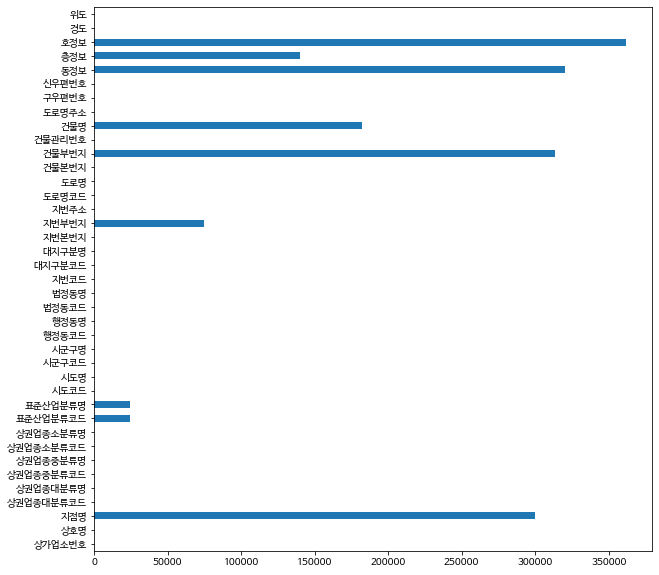

In [14]:
null_sum.plot(kind='barh', figsize=(10, 10))

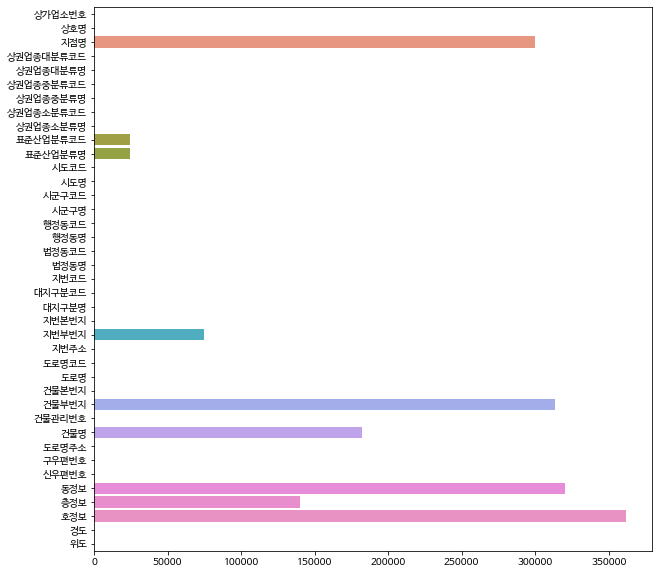

In [15]:
plt.figure(figsize=(10, 10))
sns.barplot(y=null_sum.index, x=null_sum.values)

### 2.3 정제(clean)

**누락 데이터가 많은 컬럼 삭제**

In [16]:
not_use = null_sum.sort_values(ascending=False).head(9)
not_use_col = not_use.index
not_use_col

Index(['호정보', '동정보', '건물부번지', '지점명', '건물명', '층정보', '지번부번지', '표준산업분류명',
       '표준산업분류코드'],
      dtype='object')

In [17]:
df = df.drop(not_use_col, axis=1)

In [18]:
df.isnull().sum()

상가업소번호       0
상호명          0
상권업종대분류코드    0
상권업종대분류명     0
상권업종중분류코드    0
상권업종중분류명     0
상권업종소분류코드    0
상권업종소분류명     0
시도코드         0
시도명          0
시군구코드        0
시군구명         0
행정동코드        0
행정동명         0
법정동코드        0
법정동명         0
지번코드         0
대지구분코드       0
대지구분명        0
지번본번지        0
지번주소         0
도로명코드        0
도로명          0
건물본번지        0
건물관리번호       0
도로명주소        0
구우편번호        0
신우편번호        0
경도           0
위도           0
dtype: int64

**컬럼명에 "코드" 또는 "번호"가 들어간 컬럼 삭제**

In [19]:
df.columns.str.contains("코드")

array([False, False,  True, False,  True, False,  True, False,  True,
       False,  True, False,  True, False,  True, False,  True,  True,
       False, False, False,  True, False, False, False, False, False,
       False, False, False])

In [20]:
code_cols = df.columns[df.columns.str.contains("코드")]
code_cols

Index(['상권업종대분류코드', '상권업종중분류코드', '상권업종소분류코드', '시도코드', '시군구코드', '행정동코드',
       '법정동코드', '지번코드', '대지구분코드', '도로명코드'],
      dtype='object')

In [21]:
df = df.drop(code_cols, axis=1)

In [22]:
num_cols = df.columns[df.columns.str.contains("번호")]
num_cols

Index(['상가업소번호', '건물관리번호', '구우편번호', '신우편번호'], dtype='object')

In [23]:
df = df.drop(num_cols, axis=1)

In [24]:
df.shape

(361490, 16)

In [25]:
df.head().T

,0,1,2,3,4
상호명,제중건강원,민속악기사,태평양진주,김선희꼼꼼국어교습소,비지트
상권업종대분류명,소매,소매,소매,학문/교육,음식
상권업종중분류명,건강/미용식품,취미/오락관련소매,시계/귀금속소매,학원-보습교습입시,한식
상권업종소분류명,건강원,악기판매,시계/귀금속,학원-입시,한식/백반/한정식
시도명,서울특별시,서울특별시,서울특별시,서울특별시,서울특별시
시군구명,영등포구,성동구,종로구,송파구,서초구
행정동명,영등포동,용답동,종로1.2.3.4가동,방이1동,방배4동
법정동명,영등포동5가,용답동,봉익동,방이동,방배동
대지구분명,대지,대지,대지,대지,대지
지번본번지,41,142,43,197,854


## Step 3: 데이터 탐색 (Exploratory Data Analysis)
데이터의 패턴을 찾고, 관계를 시각화 하는 작업 등으로 통해 데이터에 대한 직관을 극대화 한다.

**기술 통계 요약**

In [26]:
df.describe()

,지번본번지,건물본번지,경도,위도
count,361490.000000,361490.000000,361490.000000,361490.000000
mean,422.386384,139.732366,126.993759,37.544906
std,426.373510,259.077055,0.083937,0.049022
min,1.000000,1.000000,126.768169,37.434081
25%,102.000000,19.000000,126.922367,37.504588
50%,301.000000,46.000000,127.009557,37.542195
75%,644.000000,154.000000,127.056107,37.572518
max,9999.000000,3581.000000,127.182588,37.690787


In [27]:
df.describe(include="object")

,상호명,상권업종대분류명,상권업종중분류명,상권업종소분류명,시도명,시군구명,행정동명,법정동명,대지구분명,지번주소,도로명,도로명주소
count,361490,361490,361490,361490,361490,361490,361490,361490,361490,361490,361490,361490
unique,263524,8,89,677,1,25,425,463,2,134165,12408,133359
top,CU,음식,한식,한식/백반/한정식,서울특별시,강남구,역삼1동,역삼동,대지,서울특별시 종로구 종로6가 262-1,서울특별시 종로구 종로,"서울특별시 종로구 종로 266, (종로6가)"
freq,1702,121534,39624,29155,361490,35511,6628,8292,361232,892,2263,898


### 3.1 히스토그램으로 수치 데이터의 분포 한눈에 확인하기
- **히스토그램(histogram)** : 수치형 데이터의 구간별 빈도수를 나타내는 그래프

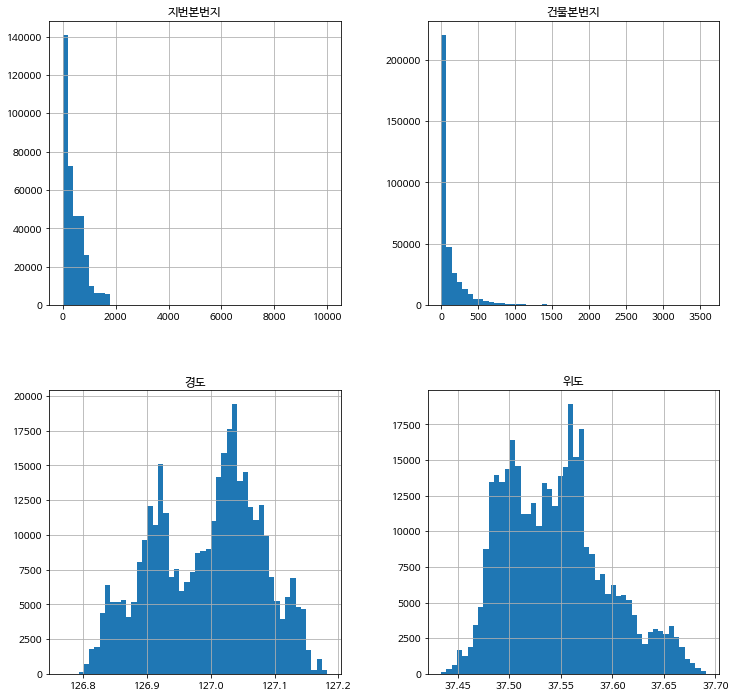

In [28]:
h = df.hist(figsize=(12, 12), bins=50)

### 3.2 상관 계수로 두 변량간의 관계 파악하기

In [29]:
corr = df.corr()

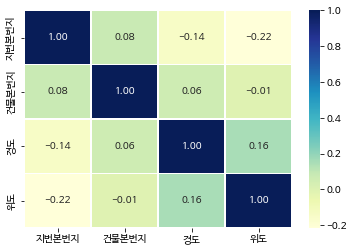

In [30]:
sns.heatmap(corr, annot=True, fmt='.2f', linewidths=0.5, cmap='YlGnBu')

* [컬러맵 정보](https://matplotlib.org/stable/tutorials/colors/colormaps.html)

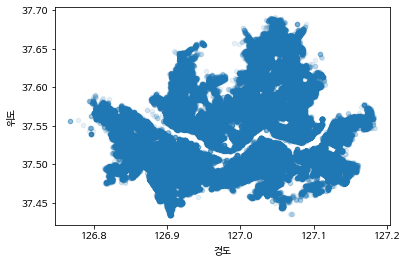

In [31]:
df.plot(kind='scatter', x='경도', y='위도', alpha=0.1) 

### 3.3 문자열 데이터에 대한 요약

- 상권업종대분류명 요약

In [32]:
df["상권업종대분류명"].describe()

count     361490
unique         8
top           음식
freq      121534
Name: 상권업종대분류명, dtype: object

- 상권업종대분류명 의 unique 값

In [33]:
df["상권업종대분류명"].unique()

array(['소매', '학문/교육', '음식', '부동산', '생활서비스', '관광/여가/오락', '숙박', '스포츠'],
      dtype=object)

- 상권업종대분류명 의 unique 값의 갯수

In [34]:
df["상권업종대분류명"].nunique()

8

- 상권업종대분류명 의 최빈값

In [35]:
df["상권업종대분류명"].mode()

0    음식
dtype: object

- 상권업종대분류명 의 빈도수

In [36]:
df["상권업종대분류명"].value_counts()

음식          121534
소매          103889
생활서비스        74450
학문/교육        26193
부동산          18600
관광/여가/오락      9167
스포츠           5290
숙박            2367
Name: 상권업종대분류명, dtype: int64

### 3.4 구별 음식점 업종 비교하기

#### (1) 서초구에는 어떤 음식점 업종이 많을까?

- 서초구에서 상권업종대분류명이 음식인 데이터만 가져오기

In [45]:
seocho_food = df[(df["시군구명"] == "서초구") & (df["상권업종대분류명"] == "음식")].copy()
seocho_food.head()

,상호명,상권업종대분류명,상권업종중분류명,상권업종소분류명,시도명,시군구명,행정동명,법정동명,대지구분명,지번본번지,지번주소,도로명,건물본번지,도로명주소,경도,위도
4,비지트,음식,한식,한식/백반/한정식,서울특별시,서초구,방배4동,방배동,대지,854,서울특별시 서초구 방배동 854-18,서울특별시 서초구 동광로18길,82,"서울특별시 서초구 동광로18길 82, (방배동)",126.991394,37.488375
6,다향,음식,한식,한식/백반/한정식,서울특별시,서초구,서초3동,서초동,대지,1485,서울특별시 서초구 서초동 1485-3,서울특별시 서초구 효령로,230,"서울특별시 서초구 효령로 230, (서초동)",127.009382,37.483436
24,장수식당,음식,한식,한식/백반/한정식,서울특별시,서초구,잠원동,잠원동,대지,29,서울특별시 서초구 잠원동 29-3,서울특별시 서초구 강남대로95길,17,"서울특별시 서초구 강남대로95길 17, (잠원동)",127.018983,37.513638
32,북경깐풍기,음식,중식,중국음식/중국집,서울특별시,서초구,서초4동,서초동,대지,1307,서울특별시 서초구 서초동 1307-18,서울특별시 서초구 강남대로65길,7,"서울특별시 서초구 강남대로65길 7, (서초동)",127.025310,37.500247
60,라이브존레스토랑,음식,양식,패밀리레스토랑,서울특별시,서초구,반포4동,반포동,대지,83,서울특별시 서초구 반포동 83-16,서울특별시 서초구 동광로49길,7,"서울특별시 서초구 동광로49길 7, (반포동)",127.001978,37.493519


In [46]:
seocho_food["상권업종중분류명"].value_counts()

한식         1966
커피점/카페     1205
분식          520
유흥주점        452
일식/수산물      449
양식          407
패스트푸드       277
제과제빵떡케익     260
닭/오리요리      213
중식          183
별식/퓨전요리     141
기타음식업        23
부페           17
음식배달서비스       5
Name: 상권업종중분류명, dtype: int64

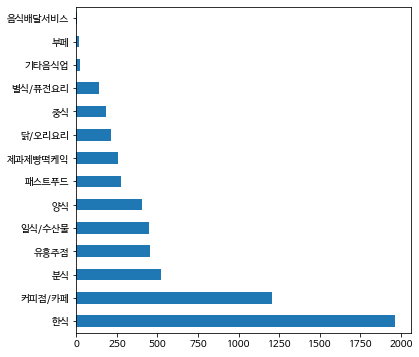

In [47]:
seocho_food["상권업종중분류명"].value_counts().plot(kind='barh', figsize=(6, 6))

**분석결과** : 서초구에는 한식, 커피점/카페, 분식 업종 순으로 상권이 분포한다.

#### (2) 구별 업종(상권업종중분류명 기준)  분포 비교하기

- 상권업종대분류명 이 음식인 데이터 준비

In [48]:
df_food = df[(df["상권업종대분류명"] == "음식")].copy()
df_food.shape

(121534, 16)

- 시군구명, 상권업종중분류명 으로 그룹화 해서 상점수 개수 구하기

In [50]:
food_groupby = df_food.groupby(["시군구명", "상권업종중분류명"])["상호명"].count()
food_groupby

시군구명  상권업종중분류명
강남구   기타음식업         49
      닭/오리요리       340
      별식/퓨전요리      224
      부페            47
      분식           751
                  ... 
중랑구   제과제빵떡케익      180
      중식            80
      커피점/카페       511
      패스트푸드        178
      한식          1247
Name: 상호명, Length: 348, dtype: int64

In [51]:
food = food_groupby.reset_index()
food = food.rename(columns={"상호명":"상호수"})
food

,시군구명,상권업종중분류명,상호수
0,강남구,기타음식업,49
1,강남구,닭/오리요리,340
2,강남구,별식/퓨전요리,224
3,강남구,부페,47
4,강남구,분식,751
...,...,...,...
343,중랑구,제과제빵떡케익,180
344,중랑구,중식,80
345,중랑구,커피점/카페,511
346,중랑구,패스트푸드,178


- 전체 업종별 평균 시각화하기

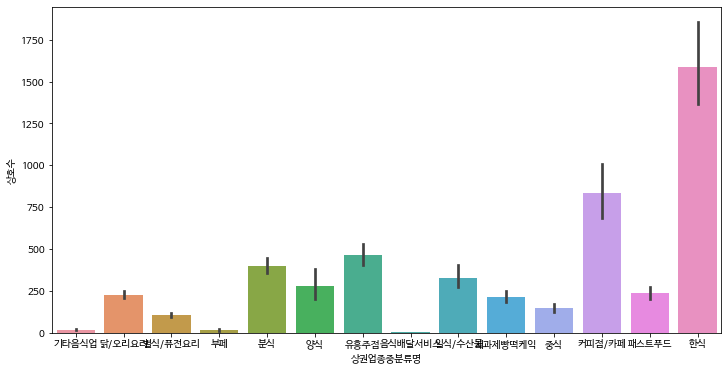

In [53]:
plt.figure(figsize=(12, 6))
sns.barplot(data=food, x="상권업종중분류명", y="상호수")

- 상권업종중분류명에 따른 상호수를 시각화하되 시군구명별로 모두 표시 (sns.catplot 이용)

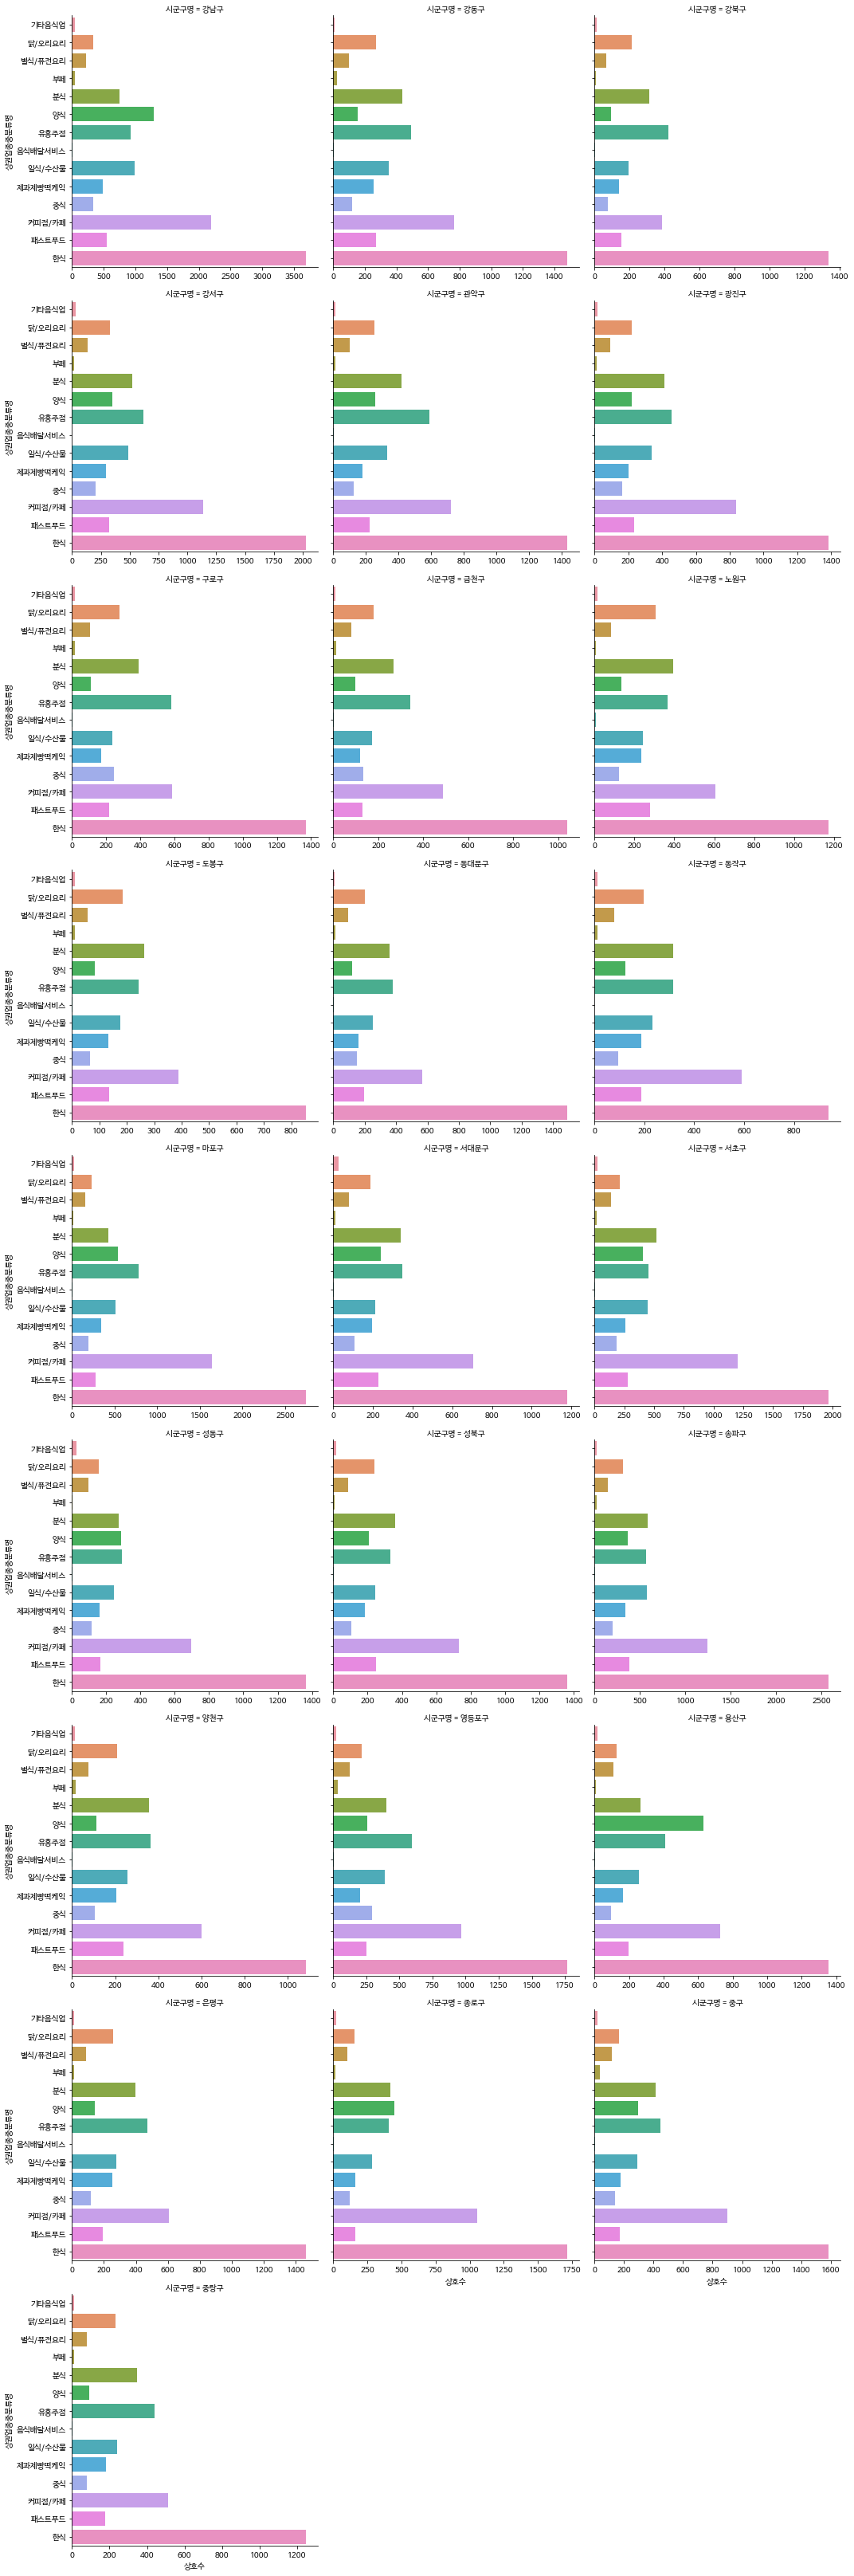

In [54]:
sns.catplot(data=food, y="상권업종중분류명", x="상호수",
            col='시군구명', kind='bar', col_wrap=3, sharex=False)

**분석결과** : 대부분의 구에서 한식->커피점/카페->유흥주점 순으로 상점수가 많으나 강남구와 중구의 경우 유흥주점보다 양식 업종이 더 많았으며 송파구의 경우에도 유흥주점보다 분식 업종이 더 많음

### 3.5 구별 학원수 비교하기

#### (1) 어느 구에 학원수가 많을까?

- 상권업종대분류명의 unique 값

In [55]:
df["상권업종대분류명"].unique()

array(['소매', '학문/교육', '음식', '부동산', '생활서비스', '관광/여가/오락', '숙박', '스포츠'],
      dtype=object)

- 상권업종대분류명이 학문/교육인 데이터 가져오기

In [57]:
df_academy = df[df["상권업종대분류명"] == "학문/교육"].copy()
df_academy.head()

,상호명,상권업종대분류명,상권업종중분류명,상권업종소분류명,시도명,시군구명,행정동명,법정동명,대지구분명,지번본번지,지번주소,도로명,건물본번지,도로명주소,경도,위도
3,김선희꼼꼼국어교습소,학문/교육,학원-보습교습입시,학원-입시,서울특별시,송파구,방이1동,방이동,대지,197,서울특별시 송파구 방이동 197-3,서울특별시 송파구 위례성대로12길,31,"서울특별시 송파구 위례성대로12길 31, (방이동)",127.121520,37.510967
8,무비디자인,학문/교육,학원-창업취업취미,학원-디자인,서울특별시,마포구,대흥동,노고산동,대지,107,서울특별시 마포구 노고산동 107-17,서울특별시 마포구 백범로,8,"서울특별시 마포구 백범로 8, (노고산동)",126.936717,37.553996
18,힐리빙텔,학문/교육,도서관/독서실,독서실,서울특별시,서대문구,신촌동,대현동,대지,37,서울특별시 서대문구 대현동 37-69,서울특별시 서대문구 이화여대5길,28,"서울특별시 서대문구 이화여대5길 28, (대현동)",126.944057,37.558414
19,김샘수학교습소,학문/교육,학원-보습교습입시,학원-입시,서울특별시,중구,신당5동,신당동,대지,851,서울특별시 중구 신당동 851,서울특별시 중구 퇴계로90길,74,"서울특별시 중구 퇴계로90길 74, (신당동, ...",127.020965,37.560996
43,노바수학학원,학문/교육,학원-보습교습입시,학원-입시,서울특별시,강남구,일원2동,개포동,대지,12,서울특별시 강남구 개포동 12-4,서울특별시 강남구 개포로,615,"서울특별시 강남구 개포로 615, (개포동)",127.075573,37.492649


- 시군구명으로 빈도수 구하기

In [58]:
df_academy["시군구명"].value_counts()

강남구     2586
송파구     1755
서초구     1699
양천구     1609
노원구     1495
강서구     1357
강동구     1341
은평구     1105
성북구     1102
마포구     1081
광진구     1059
관악구     1015
구로구     1010
동작구      998
영등포구     795
동대문구     779
중랑구      776
도봉구      759
서대문구     717
성동구      711
금천구      555
강북구      540
종로구      533
용산구      465
중구       351
Name: 시군구명, dtype: int64

- 빈도수 시각화하기

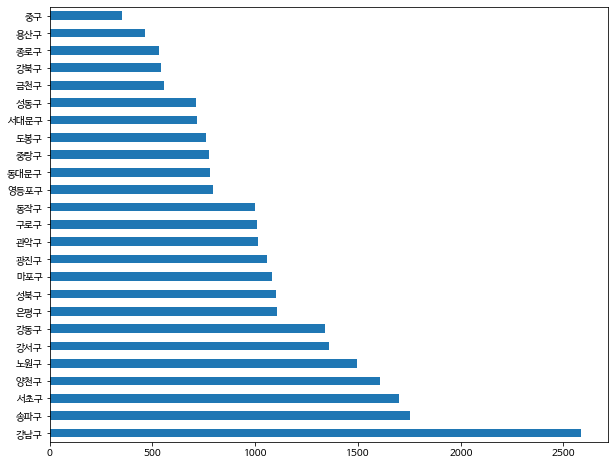

In [62]:
plt.figure(figsize=(10, 8))
df_academy["시군구명"].value_counts().plot(kind='barh')

**분석 결과** : 강남구->송파구>서초구->양천구->노원구 순으로 학원수가 많음

#### (2) 구별 학원의 세부 업종 (상권업종소분류명 기준) 분포 비교하기

- 상권업종소분류명으로 빈도수를 구하기

In [65]:
df_academy["상권업종소분류명"].value_counts()

학원-입시        4858
학원-외국어/어학    3372
학원(종합)       3220
학원-기타        2606
어린이집         2429
             ... 
학원-텔렉스/통신       1
학원-용접기술         1
학원-국가고시         1
학원-도배           1
학원-레크리에이션       1
Name: 상권업종소분류명, Length: 100, dtype: int64

- 상권업종소분류명 빈도수 기준 상위 4개만 가져오기

In [66]:
academy_top4 = df_academy["상권업종소분류명"].value_counts().head(4)
academy_top4

학원-입시        4858
학원-외국어/어학    3372
학원(종합)       3220
학원-기타        2606
Name: 상권업종소분류명, dtype: int64

- 위에서 구한 상위 4개 업종으로만 데이터 가져오기

In [67]:
df_academy_top4 = df_academy[df_academy["상권업종소분류명"].isin(academy_top4.index)].copy()
df_academy_top4.shape

(14056, 16)

In [68]:
df_academy_top4["상권업종소분류명"].value_counts()

학원-입시        4858
학원-외국어/어학    3372
학원(종합)       3220
학원-기타        2606
Name: 상권업종소분류명, dtype: int64

- 상권업종소분류명, 시군구명으로 그룹화를 해서 빈도수 구하기

In [71]:
academy_groupby = df_academy_top4.groupby(["상권업종소분류명", "시군구명"])["상호명"].count()
academy_groupby

상권업종소분류명  시군구명
학원(종합)    강남구     292
          강동구     148
          강북구      78
          강서구     187
          관악구      89
                 ... 
학원-입시     용산구      55
          은평구     223
          종로구      58
          중구       45
          중랑구     127
Name: 상호명, Length: 100, dtype: int64

In [73]:
academy = academy_groupby.reset_index()
academy = academy.rename(columns={"상호명":"상호수"})
academy

,상권업종소분류명,시군구명,상호수
0,학원(종합),강남구,292
1,학원(종합),강동구,148
2,학원(종합),강북구,78
3,학원(종합),강서구,187
4,학원(종합),관악구,89
...,...,...,...
95,학원-입시,용산구,55
96,학원-입시,은평구,223
97,학원-입시,종로구,58
98,학원-입시,중구,45


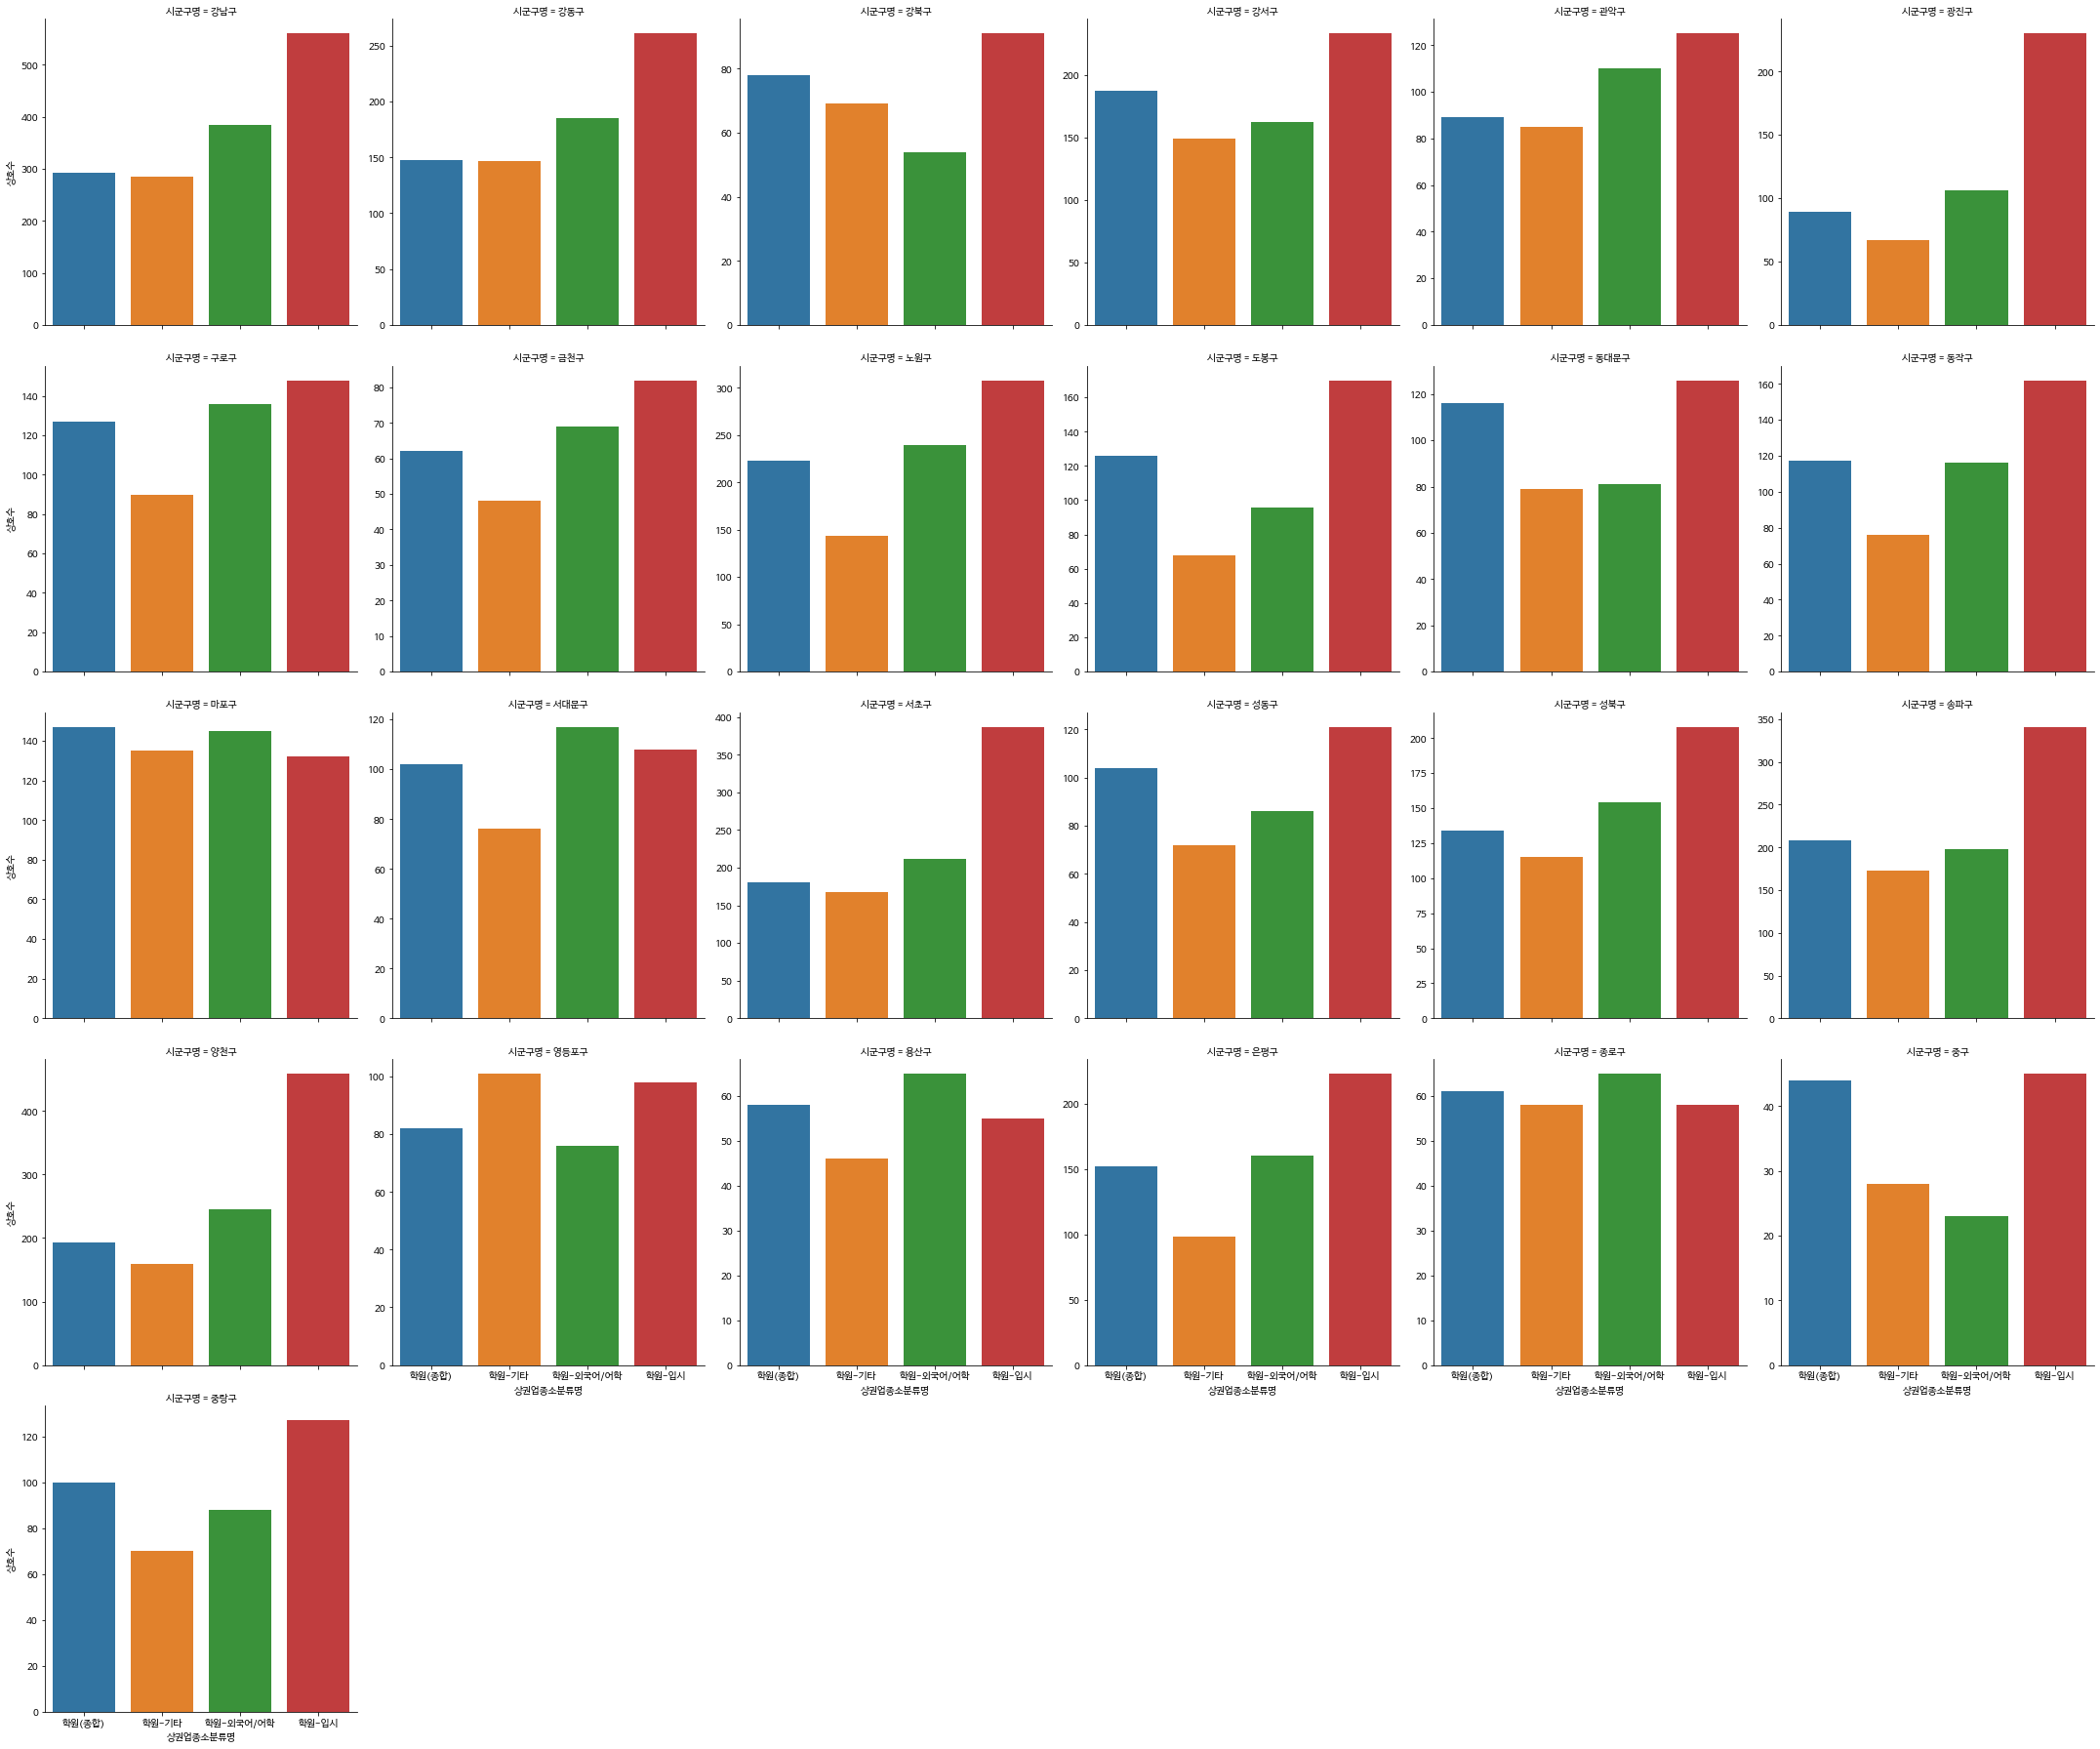

In [78]:
sns.catplot(data=academy, x="상권업종소분류명", y="상호수", kind="bar", 
            col="시군구명", col_wrap=6, sharey=False)

**분석결과** : 대부분의 구에서 학원 입시 업종이 다른 업종에 비해 상권이 많으나 마포구 영등포구, 용산구, 종로구 등은 다른 경향을 보임

#### (3) 위치 정보 시각화하기

- 위에서 구한 데이터를 구별로 시각화

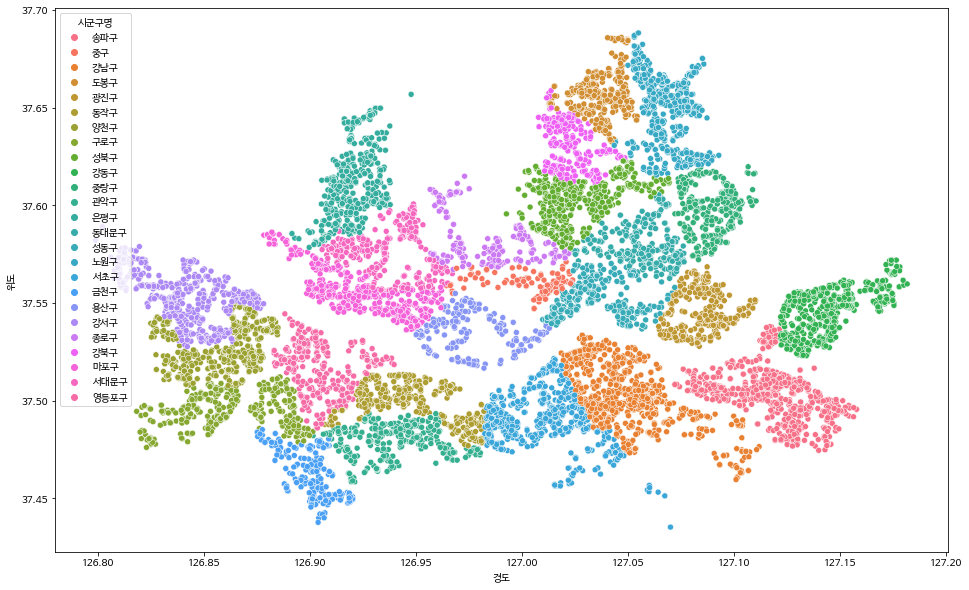

In [83]:
plt.figure(figsize=(16, 10))
sns.scatterplot(data=df_academy_top4, x="경도", y="위도", hue="시군구명")

- 학원-입시 업종만 시각화

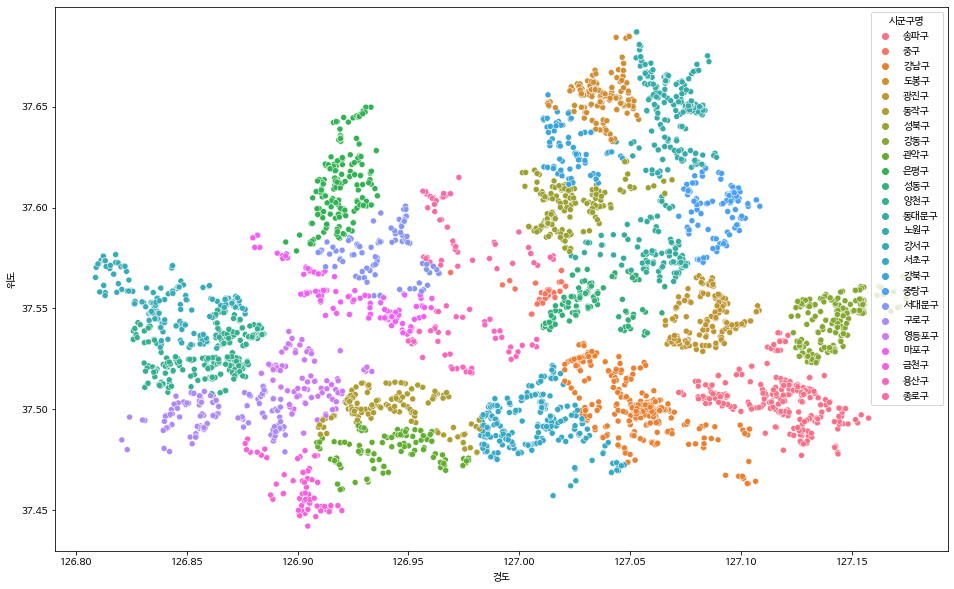

In [84]:
plt.figure(figsize=(16, 10))
sns.scatterplot(
    data=df_academy_top4[df_academy_top4["상권업종소분류명"] == "학원-입시"], 
                x="경도", y="위도", hue="시군구명")

- 강남구에 대해서만 시각화

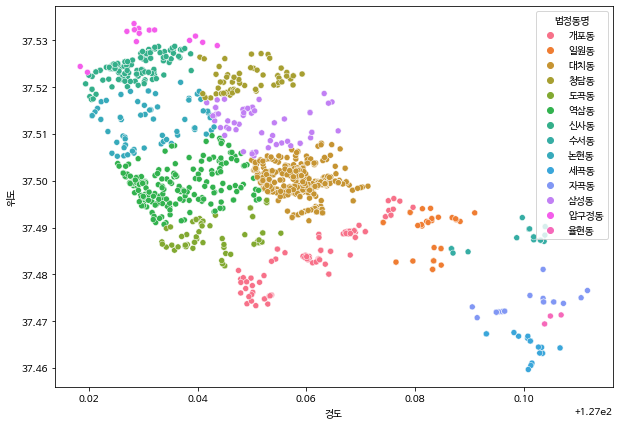

In [85]:
plt.figure(figsize=(10, 7))
sns.scatterplot(
    data=df_academy_top4[df_academy_top4["시군구명"] == "강남구"], 
                x="경도", y="위도", hue='법정동명')

- 관심 동네 비교해보기

In [86]:
df_academy_top4.loc[
    df_academy_top4["법정동명"] == "대치동", 
    "상권업종소분류명"].value_counts()

학원-입시        313
학원-외국어/어학    117
학원-기타         95
학원(종합)        73
Name: 상권업종소분류명, dtype: int64

In [87]:
df_academy_top4.loc[
    df_academy_top4["법정동명"] == "세곡동", 
    "상권업종소분류명"].value_counts()

학원(종합)       10
학원-입시         8
학원-외국어/어학     4
학원-기타         4
Name: 상권업종소분류명, dtype: int64

In [88]:
df_academy_top4.loc[
    df_academy_top4["법정동명"] == "자곡동", 
    "상권업종소분류명"].value_counts()

학원-기타        12
학원-외국어/어학     4
학원(종합)        3
학원-입시         1
Name: 상권업종소분류명, dtype: int64